# **Fake News Detection**

## Authors

1. Ida Chepng'eno
2. George Mbugua
3. Kevan Ndwiga
4. Daniel Muruthi
5. Mike Kiptoch
6. Neville Ngenzi



## 1. **BUSINESS UNDERSTANDING**

As a leading news organization in Kenya, Tuko News faces the formidable challenge of combating fake news to uphold journalistic integrity and maintain public trust. The dissemination of fake news poses substantial risks to Tuko News, including erosion of reader confidence, polarization of public opinion, and potential legal ramifications. To address these challenges, Tuko News recognizes the urgent need for sophisticated systems capable of detecting and flagging fake news in real-time. By implementing robust fake news detection mechanisms, Tuko News aims to safeguard its reputation, enhance public trust, and ensure the dissemination of accurate and reliable information.


### a. Introduction

In today's digital age, the spread of misinformation, commonly known as fake news, has become a pervasive issue, undermining the integrity of journalistic organizations worldwide. Tuko News, as a leading news organization in Kenya, recognizes the gravity of this challenge and aims to address it proactively. Through the implementation of advanced technologies and rigorous methodologies, Tuko News seeks to combat the dissemination of fake news and uphold its commitment to journalistic integrity and public trust.

### b. Problem Statement

#### **What is the prevailing Circumstance?**

The proliferation of social media platforms and digital news outlets has facilitated the rapid dissemination of information, both accurate and false. This unprecedented accessibility to news sources has led to an alarming increase in the circulation of fake news, which poses significant risks to Tuko News and its stakeholders.

#### **What problem is being addressed?**

The primary problem being addressed is the pervasive presence of fake news within the digital media landscape. Fake news undermines the credibility of Tuko News as a reputable journalistic entity, erodes reader confidence, and contributes to the polarization of public opinion. Moreover, the dissemination of false information can have far-reaching consequences, including social unrest, political instability, and legal ramifications.

#### **How the project aims to solve the problems?**

The project aims to develop and implement sophisticated systems for detecting and flagging fake news in real-time. By leveraging cutting-edge technologies such as natural language processing (NLP), machine learning (ML), and data analytics, Tuko News intends to identify and verify the authenticity of news articles and sources. Additionally, the project will involve the establishment of rigorous editorial standards and fact-checking procedures to ensure the dissemination of accurate and reliable information to its audience. Through these initiatives, Tuko News seeks to safeguard its reputation, enhance public trust, and uphold the principles of ethical journalism.



### c. Objectives

#### Main Objectives

- To implement robust fake news detection mechanisms capable of identifying and flagging misinformation in real-time, thereby safeguarding the integrity and credibility of Tuko News.

#### Specific Objectives

1. Develop a comprehensive dataset of labeled news articles, encompassing both genuine and fake content, to train and validate machine learning models for fake news detection.
2. Utilize natural language processing (NLP) techniques to extract relevant features from news articles, such as linguistic patterns, sentiment analysis, and lexical semantics.
3. Implement state-of-the-art machine learning algorithms, including supervised and unsupervised learning approaches, to classify news articles as genuine or fake based on extracted features.
4. Integrate the fake news detection system seamlessly into Tuko News's content management workflow, enabling automated flagging and verification of potentially false information.
5. Establish a framework for continuous monitoring and evaluation of the fake news detection system's performance, including metrics such as precision, recall, and F1 score.
6. Conduct regular updates and improvements to the fake news detection system to adapt to evolving misinformation tactics and enhance its accuracy and reliability over time.


### d. Notebook Structure

i. Business Understanding
ii. Data Understanding
iii. Exploratory Data Analysis
iv. Data Preprocessing
v. Modeling
vi. Evaluation
vii. Conclusion
viii. Recommendation
ix. Next Steps


### e. Stakeholders

The media sector, news organizations, and social media sites that disseminate news pieces can all benefit from this endeavor. These organizations can enhance their content control and stop the spread of false information by categorizing news stories as legitimate or fake.


### f. Metric of Success

- The performance of the model is evaluated based on achieving an accuracy of over 85%.


## 2. **Data Understanding**

The dataset comprises two CSV files: "Fake.csv" and "True.csv", sourced from Kaggle each contain 20,000 rows. Columns include 'title', 'text', 'subject', and 'date'
Each file contains news articles, distinguished by their authenticity. 'Fake.csv' contains fake news articles, while 'True.csv' contains genuine news articles.


Title Column:
Offers succinct summaries of news article content.
Crucial for headline analysis and understanding key themes. 
Text Column:
Contains full textual content of the news articles.
Provides detailed information for NLP tasks such as sentiment analysis and text classification. 
Subject Column:
Categorizes news articles into specific subjects or domains.
Enables filtering and analysis based on topics of interest.
Date Column:
Records publication dates of news articles.
Facilitates temporal analysis and trend tracking.



### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer 
import scipy.sparse as sp 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
from sklearn.metrics import confusion_matrix
import re
import string


### Loading The Datasets

In [2]:
# Loading the true_news dataset

true_news = pd.read_csv('True.csv')
true_news.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
# Loading the fake_news dataset

fake_news = pd.read_csv('Fake.csv')
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# Printing the shape of each DataFrame

print("Shape of true_news dataset:", true_news.shape)
print("Shape of fake_news dataset:", fake_news.shape)

Shape of true_news dataset: (21417, 4)
Shape of fake_news dataset: (23481, 4)


The shapes of the two datasets suggest that the "true_news" dataset contains 21,417 entries with four attributes, while the "fake_news" dataset contains 23,481 entries with the same four attributes. This indicates that there are more entries in the "fake_news" dataset compared to the "true_news" dataset, potentially reflecting a larger volume of fabricated or misleading news articles compared to genuine news articles within the dataset.

In [5]:
# Printing the info of each DataFrame

print("Info of true_news dataset:")
print(true_news.info())

print("\nInfo of fake_news dataset:")
print(fake_news.info())

Info of true_news dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None

Info of fake_news dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


In [6]:
# Checking the column names of true_news dataset
print("Column names of true_news dataset:")
print(list(true_news.columns))

# Checking the column names of fake_news dataset
print("\nColumn names of fake_news dataset:")
print(list(fake_news.columns))

Column names of true_news dataset:
['title', 'text', 'subject', 'date']

Column names of fake_news dataset:
['title', 'text', 'subject', 'date']


In [7]:
fake_news.duplicated().sum()

3

In [9]:
fake_news.drop_duplicates().head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
true_news.duplicated().sum()

206

In [17]:
# Drop duplicates and update the DataFrame in place
true_news.drop_duplicates(inplace=True)

# Check the shape of the DataFrame after dropping duplicates
print("Shape of the DataFrame after dropping duplicates:", true_news.shape)


Shape of the DataFrame after dropping duplicates: (21211, 4)


In [16]:
# Drop duplicates and update the DataFrame in place
fake_news.drop_duplicates(inplace=True)

# Check the shape of the DataFrame after dropping duplicates
print("Shape of the DataFrame after dropping duplicates:", fake_news.shape)


Shape of the DataFrame after dropping duplicates: (23478, 4)


In [18]:
# Checking the sum of missing values 
print("Missing values in the True news dataset:\n", true_news.isnull().any())
print("Missing values in the Fake news dataset:\n", fake_news.isnull().any())


Missing values in the True news dataset:
 title      False
text       False
subject    False
date       False
dtype: bool
Missing values in the Fake news dataset:
 title      False
text       False
subject    False
date       False
dtype: bool


The absence of missing values in both the "True news" and "Fake news" datasets, as indicated by the boolean values (False), suggests that all entries across the title, text, subject, and date attributes are filled. This indicates that the datasets are relatively clean and complete, which is beneficial for analysis or modeling tasks as it ensures there are no gaps in the data that could potentially impact the results.

#### Assigning Classes to the Dataset

In [19]:
fake_news['class'] = 0
true_news['class'] = 1

In [20]:
fake_news.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [21]:
true_news.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Adding a new column labeled 'class' to both the "fake_news" and "true_news" datasets with values of 0 and 1, respectively, likely serves to assign a binary label indicating the authenticity of the news articles. In this context, the 'class' column acts as a target variable for classification tasks, where '0' typically represents fake news and '1' represents true news. This labeling enables machine learning models to learn patterns and distinguish between genuine and fabricated news articles based on the provided features.

In [22]:
# Printing value counts for the 'subject' column in the true_news dataset
print("Value counts for 'subject' column in the true_news dataset:")
print(true_news['subject'].value_counts())

# Printing value counts for the 'subject' column in the fake_news dataset
print("\nValue counts for 'subject' column in the fake_news dataset:")
print(fake_news['subject'].value_counts())

Value counts for 'subject' column in the true_news dataset:
subject
politicsNews    11220
worldnews        9991
Name: count, dtype: int64

Value counts for 'subject' column in the fake_news dataset:
subject
News               9050
politics           6838
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


## 3. Exploratory Data Analysis

- This stage entails thoroughly exploring and comprehending the dataset prior to employing machine learning algorithms. It plays a crucial role in tasks such as data preprocessing, selecting appropriate models, and devising strategies for evaluating model performance.

### Distribution of Subject Column

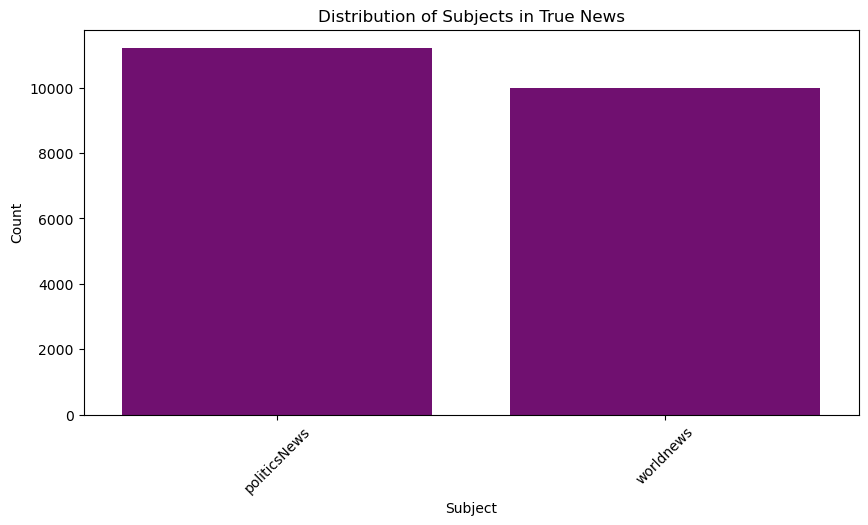

In [23]:
# Get the distribution of 'subject' in both datasets
true_subject_counts = true_news['subject'].value_counts()
fake_subject_counts = fake_news['subject'].value_counts()


# Plot the distribution for true news
plt.figure(figsize=(10, 5))
sns.barplot(x=true_subject_counts.index, y=true_subject_counts.values, color = 'purple')
plt.title('Distribution of Subjects in True News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



The bar chart shows the distribution of subjects covered in true news articles, with politics being the most common subject and world news following in second.  

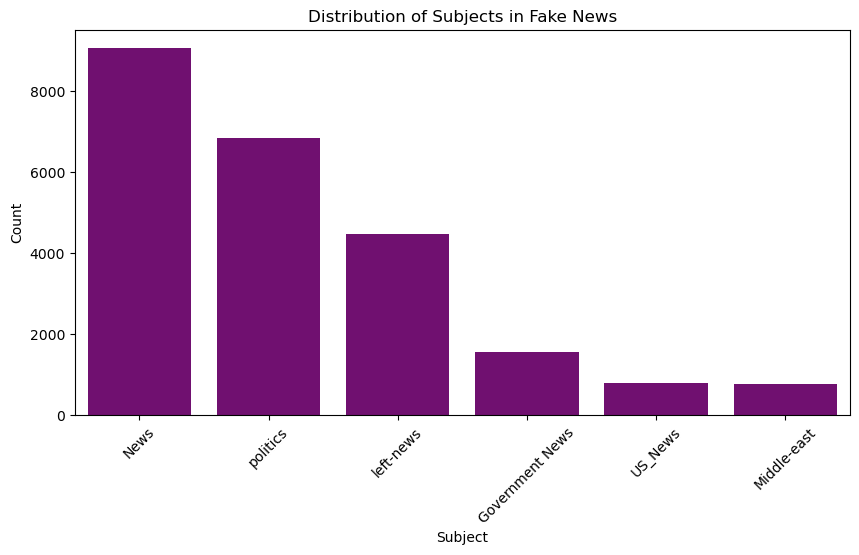

In [24]:

# Plot the distribution for fake news
plt.figure(figsize=(10, 5))
sns.barplot(x=fake_subject_counts.index, y=fake_subject_counts.values, color ='purple')
plt.title('Distribution of Subjects in Fake News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


- These bar plots illustrate the distribution of subjects in both true and fake news datasets. This can help identify which subjects are more common in each dataset and whether there's a notable difference.

### Analysis of Article Length (Word Count)


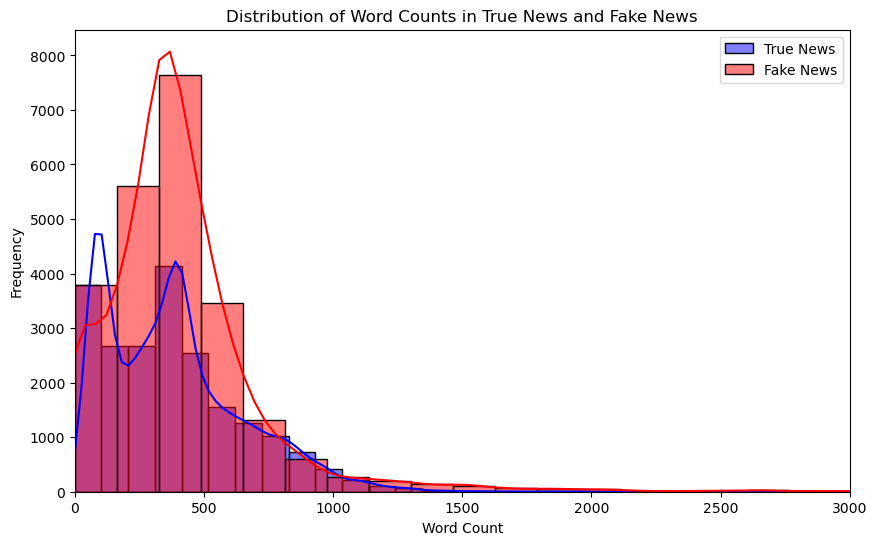

In [25]:

# Calculate word counts for both datasets
true_news['word_count'] = true_news['text'].apply(lambda x: len(x.split()))
fake_news['word_count'] = fake_news['text'].apply(lambda x: len(x.split()))

# Create a single plot with histograms for both datasets, limited to word counts up to 3,000
plt.figure(figsize=(10, 6))
sns.histplot(data=true_news, x='word_count', kde=True, color='blue', alpha=0.5, label='True News', bins=50)
sns.histplot(data=fake_news, x='word_count', kde=True, color='red', alpha=0.5, label='Fake News', bins=50)

# Set titles and labels
plt.title('Distribution of Word Counts in True News and Fake News' )
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Set the x-axis limit to 3,000
plt.xlim(0, 3000)

# Add a legend
plt.legend()

# Show the plot
plt.show()


- This  aims to visually compare the distribution of word counts between true and fake news datasets.

- This visualization reveals a trend towards shorter articles in true news compared to fake news. The blue curve (true news) peaks at a lower word count than the red curve (fake news). This suggests that fake news articles tend to be fluffier, containing more words spread across a similar number of articles.

### Investigate Relationships between Subject and Class

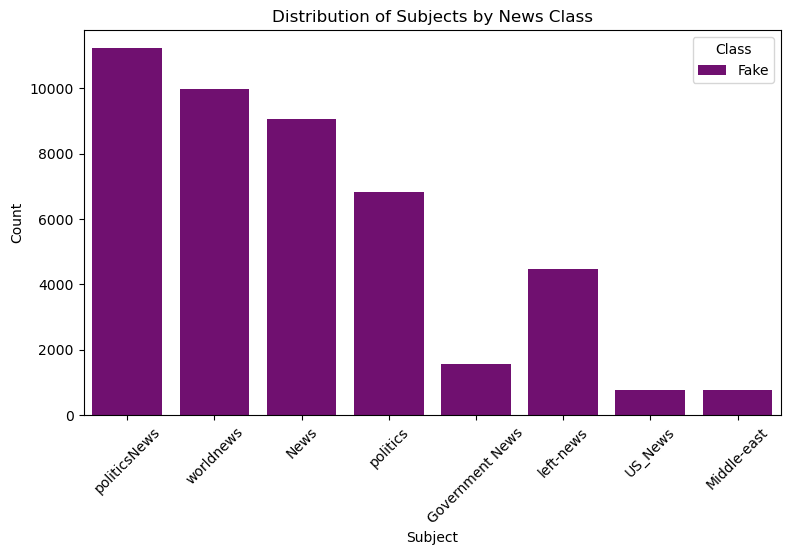

In [26]:

# Concatenate the true and fake news datasets
combined_data = pd.concat([true_news, fake_news])

# Plot the relationship between 'subject' and 'class' using count plot
plt.figure(figsize=(9, 5))
sns.countplot(data=combined_data, x='subject', color='purple')
plt.title("Distribution of Subjects by News Class")
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Class', labels=['Fake', 'True'])
plt.show()


- This aims to visually represent the distribution of subjects in the combined dataset, categorized by their respective news class (true or fake).

## 4. Text Preprocessing

Text processing helps to prepare the text data for further analysis or modeling by cleaning it and reducing each word to its base form through stemming or lemmatization.

Here's a summary of the text preprocessing steps:

- Lowercasing the Text: Convert all letters in the text to lowercase. This ensures consistency and prevents the model from treating the same words differently based on their case.
- Removing Punctuation and Digits: Strip non-alphabetic characters such as punctuation marks and digits from the text. This simplifies the text and reduces noise in the data.
- Removing Stop Words: Eliminate common words like "the", "and", "in", etc., which don't contribute significantly to the meaning of the text. This reduces the dimensionality of the data and focuses on more meaningful words.
- Stemming or Lemmatizing the Text: Reduce words to their base form. Stemming involves removing suffixes to obtain the root form of a word, while lemmatizing considers the morphological analysis to produce the base form. Both techniques help in reducing word variations and simplifying the data.


By applying these preprocessing steps, the text data becomes cleaner, more standardized, and easier for machine learning models to process and analyze, ultimately enhancing the accuracy of text classification tasks.

In [29]:
# Setup for stopwords, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def remove_punctuation(text):
    # Normalize to a standard Unicode representation
    text = unicodedata.normalize('NFKD', text)
    # Additional punctuation marks to remove
    extra_punctuation = '“”‘’—–'  # Adding common types of quotation marks and dashes
    # Create a translation table with standard punctuation and additional marks
    punctuation = string.punctuation + extra_punctuation
    translator = str.maketrans('', '', punctuation)
    return text.translate(translator)

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove all punctuation
    text = remove_punctuation(text)

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Stem the words
    words = [stemmer.stem(word) for word in words]

    # Join the words back into a string
    return ' '.join(words)

# Apply the preprocess_text function to your DataFrame columns
true_news['text'] = true_news['text'].apply(preprocess_text)
fake_news['text'] = fake_news['text'].apply(preprocess_text)


- This is to Ensure that the text has been cleaned and pre-processed, removing punctuation, stopwords, and converting the text to lowercase. 

In [30]:
# Tokenize and remove stop words for true news
true_tokens = [word for text in true_news['text'] for word in text.split() if word not in stop_words]

# Tokenize and remove stop words for fake news
fake_tokens = [word for text in fake_news['text'] for word in text.split() if word not in stop_words]

# Create word frequency counters
from collections import Counter

true_word_count = Counter(true_tokens)
fake_word_count = Counter(fake_tokens)

# Most common words in each dataset
most_common_true = true_word_count.most_common(20)  # Top 20 words in true news
most_common_fake = fake_word_count.most_common(20)  # Top 20 words in fake news

- This code segment is useful for analyzing and comparing the frequency of occurrence of words in both true and fake news datasets, which can provide insights into the characteristics and content of the news articles in each category.

### Visualization: Word Clouds

Text(0.5, 1.0, 'Word Cloud for True News')

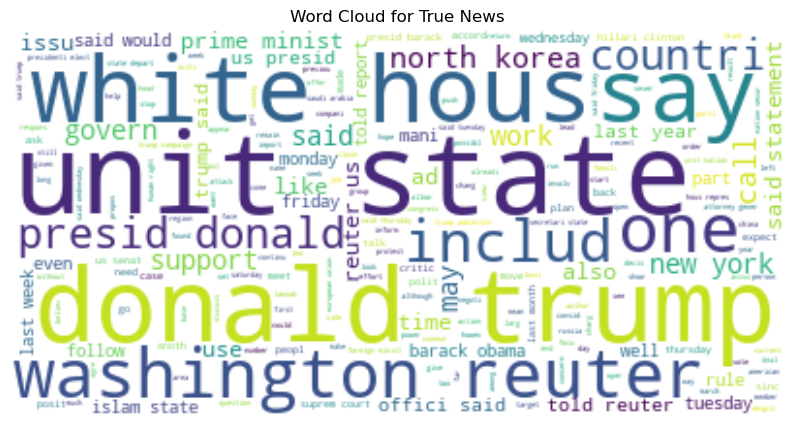

In [31]:
# Create a word cloud for true news
wordcloud_true = WordCloud(stopwords=stop_words, background_color='white').generate(' '.join(true_tokens))

# Create a word cloud for fake news
wordcloud_fake = WordCloud(stopwords=stop_words, background_color='white').generate(' '.join(fake_tokens))

# Plot word clouds
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for True News')

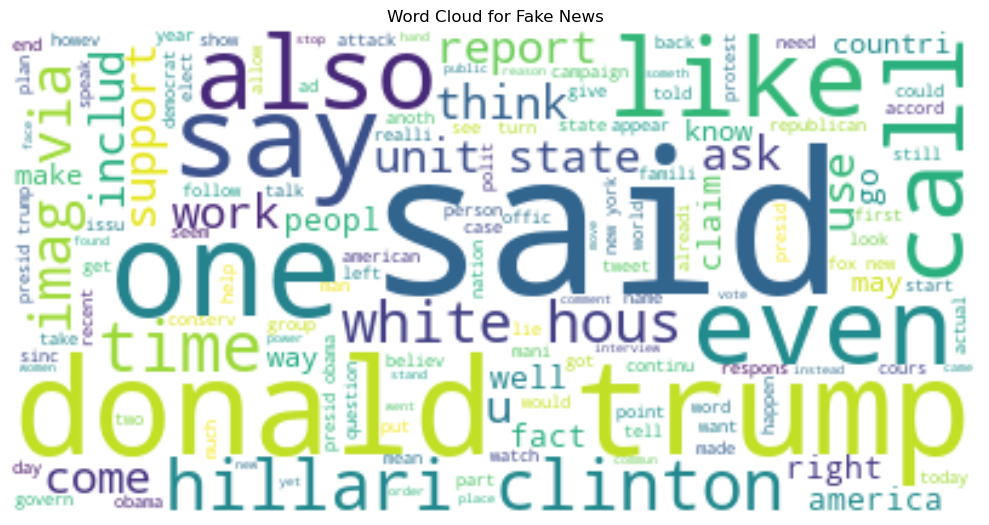

In [32]:
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')

plt.tight_layout()
plt.show()

- This segment provides a visual representation of the most frequent words in both true and fake news datasets through word clouds, allowing for quick insights into the prevalent themes or topics within each category.

#### Most Common Words in True News And Fake News

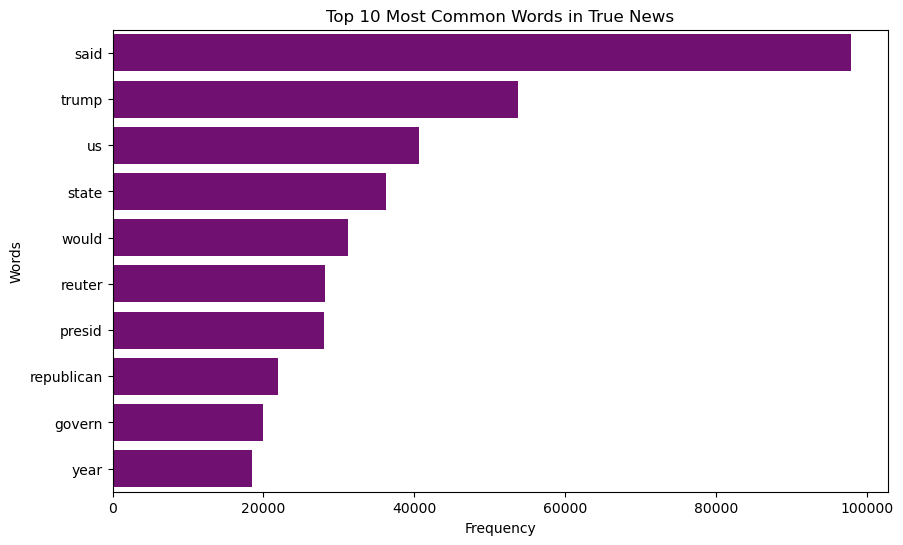

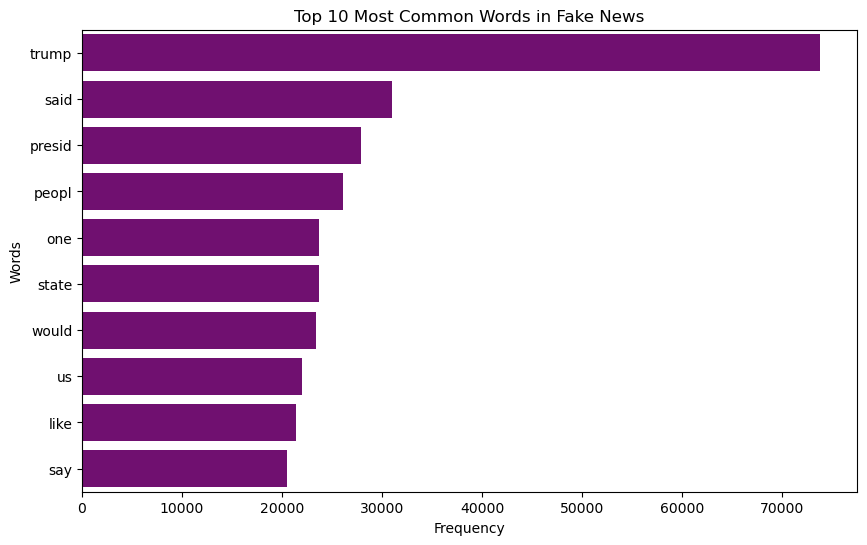

In [33]:
# Create bar plots for the most common words in true news
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in most_common_true[:10]], y=[x[0] for x in most_common_true[:10]], color='purple')
plt.title('Top 10 Most Common Words in True News')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# Create bar plots for the most common words in fake news
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in most_common_fake[:10]], y=[x[0] for x in most_common_fake[:10]], color='purple')
plt.title('Top 10 Most Common Words in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()



- This indicates some of the most common words in both datasets are related to politics and Donald Trump. However, there are some differences between the two datasets, with the fake news dataset containing more references to  Hillary Clinton and a greater use of words like “like”,“said”,“would”.

## 5. Modeling
### Model Training

In [34]:
# Instantiate CountVectorizer object
vectorizer = CountVectorizer()

# Convert text data from 'true_news' DataFrame into a document-term matrix
X_real = vectorizer.fit_transform(true_news['text'])

# Convert text data from 'fake_news' DataFrame into a document-term matrix, using the same vocabulary as X_real
X_fake = vectorizer.transform(fake_news['text'])

# Concatenate the document-term matrices for real and fake news vertically
X = sp.vstack([X_real, X_fake])

# Create target labels: 1 for real news, 0 for fake news
y = np.concatenate([np.ones(X_real.shape[0]), np.zeros(X_fake.shape[0])])   

This is to prepare the data for a binary classification task by converting text data from true and fake news articles into a matrix of token counts using CountVectorizer. It then combines the matrices of token counts for both true and fake news articles and creates corresponding labels for classification.

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This code utilizes the train_test_split function from scikit-learn to split the data into training and testing sets. The parameter test_size=0.2 specifies that 20% of the data will be used for testing, while the remaining 80% will be used for training. The random_state=42 parameter ensures that the split is reproducible, meaning that if the code is run again with the same random state, it will produce the same split.

#### **Baseline Model: Logistic Regression**

In [36]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

This code imports logistic regression from scikit-learn, initializes a logistic regression classifier with a specific random state, and then trains the classifier using training data X_train and corresponding labels y_train.



After training the model, it's imperative to assess its performance on the test set. Utilize standard evaluation metrics including accuracy, precision, recall, and F1 score to comprehensively evaluate its efficacy.

In [37]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)  # Calculating accuracy
precision = precision_score(y_test, y_pred)  # Calculating precision
recall = recall_score(y_test, y_pred)  # Calculating recall
f1 = f1_score(y_test, y_pred)  # Calculating F1 score

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.9953009621839337
Precision: 0.9967259120673526
Recall: 0.9934731934731935
F1 Score: 0.9950968946999766


These metrics suggest that the baseline model (logistic regression model) is performing exceptionally well in identifying fake news. However, it's important to consider the possibility of overfitting, data imbalance, or other factors that could influence the performance of the model on unseen data. It's also advisable to evaluate the model using cross-validation and test it on a separate validation set to ensure its generalization capability.

#### **Improving the Performance of the Model**


While logistic regression model performed well on the test set, there are ways to make it even more efficient:

- **Feature engineering:** Using more complex text representations, such as word embeddings or topic models, in place of merely using a bag-of-words approach, may help reveal more detailed relationships between words.

- **Hyperparameter optimization:** this will determine the best parameter configuration for the dataset by fine-tuning the logistic regression model's hyperparameters using strategies like grid search and randomized search.


In [38]:
# Define a function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Predict the labels for the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
# Train and evaluate a Multinomial Naive Bayes model
print("Training and evaluating Multinomial Naive Bayes model...")
nb = MultinomialNB()
train_and_evaluate_model(nb, X_train, y_train, X_test, y_test)
print()

# Train and evaluate a Support Vector Machine model
print("Training and evaluating Support Vector Machine model...")
svm = SVC()
train_and_evaluate_model(svm,  X_train, y_train, X_test, y_test)

Training and evaluating Multinomial Naive Bayes model...
Accuracy: 0.9478
Precision: 0.9478
Recall: 0.9478
F1-score: 0.9477

Training and evaluating Support Vector Machine model...
Accuracy: 0.9936
Precision: 0.9936
Recall: 0.9936
F1-score: 0.9936


The objective is to identify the most effective model in accurately distinguishing between fake and real news articles.  
- The logistic regression model demonstrates exceptional performance in accurately classifying fake news articles. With high precision and recall, it effectively identifies fake news instances while minimizing false positives and false negatives.
- Although the Multinomial Naive Bayes model achieves decent performance, its accuracy and F1-score fall short compared to logistic regression. However, it maintains consistent precision and recall, indicating reliable performance in identifying fake news.
- Similar to logistic regression, the Support Vector Machine model demonstrates exceptional performance across all metrics. It effectively identifies fake news articles with high accuracy and balanced precision-recall trade-off.

Both the logistic regression and Support Vector Machine models exhibit superior performance in fake news prediction compared to Multinomial Naive Bayes. While logistic regression offers simplicity and interpretability, Support Vector Machine provides robust performance with higher accuracy. These models serve as valuable tools in combating the spread of misinformation and ensuring the credibility of news sources. 

#### Model 2: Deep Learning with Convolutional Neural Networks (CNNs)

- Using 1D convolutions to extract patterns (like n-grams) in the text.

In [39]:

# Text Preparation
max_words = 5000  # Adjust the vocabulary size
max_sequence_length = 100  # Maximum length of sequences

# Tokenization and Padding
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(np.concatenate([true_news['text'], fake_news['text']]))

X_real_seq = tokenizer.texts_to_sequences(true_news['text'])
X_fake_seq = tokenizer.texts_to_sequences(fake_news['text'])

X_real_padded = pad_sequences(X_real_seq, maxlen=max_sequence_length)
X_fake_padded = pad_sequences(X_fake_seq, maxlen=max_sequence_length)

X = np.vstack([X_real_padded, X_fake_padded])
y = np.concatenate([np.ones(X_real_padded.shape[0]), np.zeros(X_fake_padded.shape[0])])



In [40]:
model = keras.Sequential([
    layers.Embedding(input_dim=max_words, output_dim=128),  # Embedding layer
    layers.Conv1D(64, 5, activation='relu'),  # Convolutional layer (64 filters, kernel size of 5)
    layers.MaxPooling1D(3),  # Pooling layer
    layers.Conv1D(64, 5, activation='relu'),  # Additional convolutional layer
    layers.GlobalMaxPooling1D(),  # Global max pooling
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(1, activation='sigmoid')  # Dense layer for binary classification
])


- This architecture is designed to extract features from text data and classify it into binary categories, using convolutional layers for feature extraction, pooling layers to reduce dimensionality, dropout to avoid overfitting, and a final dense layer to output binary predictions.

In [41]:
# Model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Training
model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=32)


Epoch 1/10
  92/1006 ━━━━━━━━━━━━━━━━━━━━ 8:19:47 33s/step - accuracy: 0.5086 - loss: 0.6952

In [ ]:
# Model Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9753 - loss: 0.1938
Test Loss: 0.1843, Test Accuracy: 0.9769


- The high test accuracy indicates that your CNN model is effective at distinguishing between fake and real news. With nearly 98.64% correct predictions on the test data, it shows strong generalization.
- The relatively low test loss reinforces that the model is learning well and making accurate predictions.

## Model Evaluation


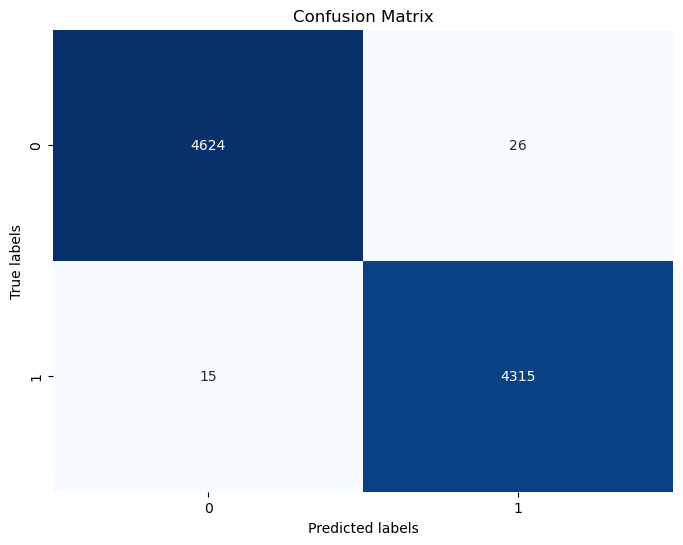

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


This code below defines a function train_and_evaluate_model to train and evaluate a machine learning model on given training and testing data. It then initializes two models (Multinomial Naive Bayes and Support Vector Machine), trains each model using the training data, evaluates their performance using various metrics (accuracy, precision, recall, and F1-score), and compares their performance through a graphical visualization.

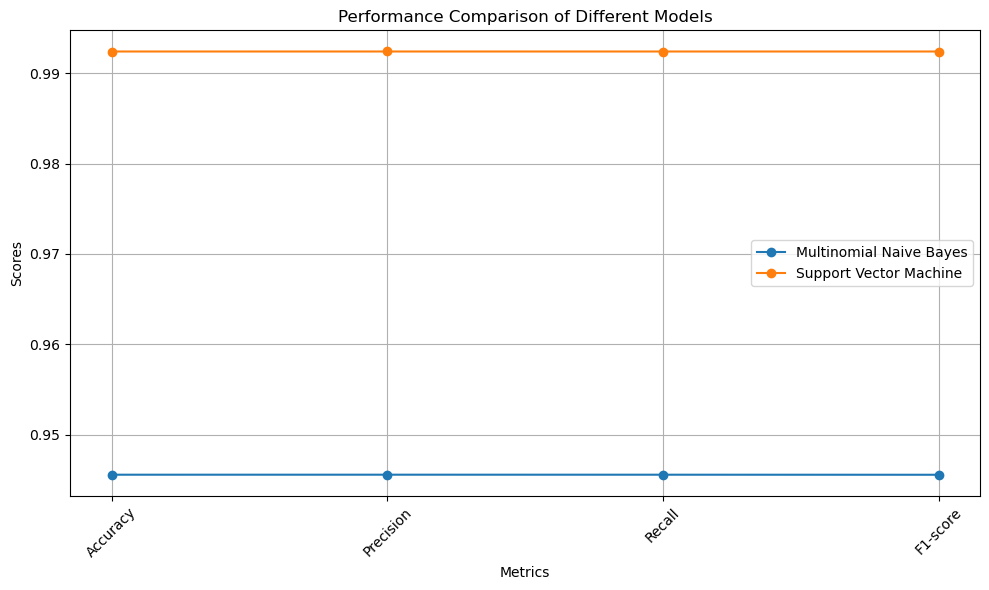

In [ ]:
# Define a function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Predict the labels for the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

# Initialize models
nb = MultinomialNB()
svm = SVC()

# Train and evaluate models
model_names = ['Multinomial Naive Bayes', 'Support Vector Machine']
models = [nb, svm]
results = []

for model in models:
    accuracy, precision, recall, f1 = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append([accuracy, precision, recall, f1])

# Convert results to numpy array
results = np.array(results)

# Plot the graph
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
num_models = len(model_names)
index = np.arange(len(metrics))

plt.figure(figsize=(10, 6))

for i in range(num_models):
    plt.plot(metrics, results[i], marker='o', label=model_names[i])

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Comparison of Different Models')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## Model Deployment


### Save the Entire Model

In [ ]:
# Save the model to HDF5
model.save('cnn_model.h5')  # Saves model architecture, weights, and compile information


### Load and Compile the Model

In [ ]:
# Load the model
loaded_model = keras.models.load_model('cnn_model.h5')  # or 'cnn_model' for SavedModel format

# Compile if needed
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


### Export the Tokenizer

In [ ]:
# Save the tokenizer to reuse it during deployment
dump(tokenizer, 'tokenizer.joblib')  # Saves the tokenizer for later use


# Conclusion

# Recommendation

# Next Steps